# Adidas Sales

## Table of Contents

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [44]:
#Create path
path = r'/Users/rusamijan/04-2023 Adidas Sales Analysis'

In [45]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ad_cleaned.pkl'))

### Data cleaning

In [46]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [47]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50%,In-store
1,Foot Locker,1185732,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30%,In-store
2,Foot Locker,1185732,1/3/20,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35%,In-store
3,Foot Locker,1185732,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35%,In-store
4,Foot Locker,1185732,1/5/20,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30%,In-store


In [48]:
df.shape

(9648, 13)

##### Missing values

In [49]:
# check for missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [50]:
dups = df.duplicated()
dups.shape # No dups

(9648,)

##### Extreme values checks

/Users/rusamijan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Sales', ylabel='Density'>

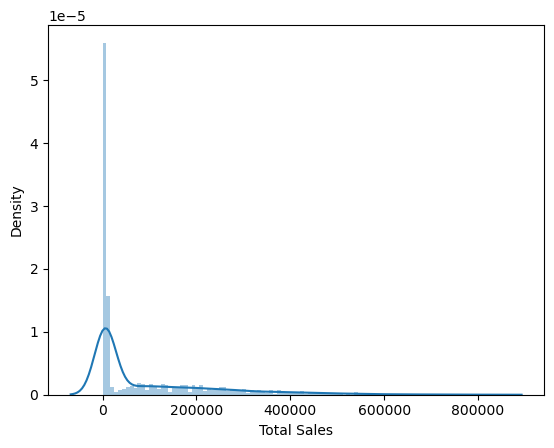

In [51]:
# extreme value check
sns.distplot(df['Total Sales'], bins=100) # Shows extreme values

In [52]:
df['Total Sales'].mean() # Check the mean

93273.4375

In [53]:
df['Total Sales'].median() # Check the median

9576.0

In [54]:
df['Total Sales'].max() # Check the max

825000.0

In [55]:
## Data prep for regression analysis 

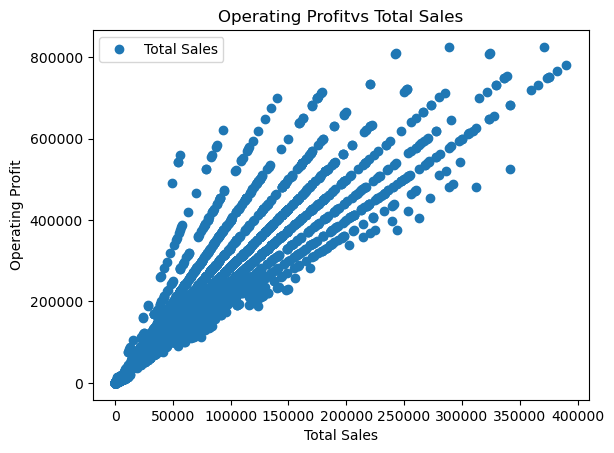

In [56]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Operating Profit', y='Total Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Operating Profitvs Total Sales')  
plt.xlabel('Total Sales')  
plt.ylabel('Operating Profit')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Operating Profit'].values.reshape(-1,1)
y = df['Total Sales'].values.reshape(-1,1)

In [58]:
X

array([[300000.],
       [150000.],
       [140000.],
       ...,
       [  2791.],
       [  1235.],
       [   650.]])

In [59]:
y

array([[600000.],
       [500000.],
       [400000.],
       ...,
       [  7544.],
       [  2940.],
       [  2407.]])

In [60]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
### Regression analysis

In [62]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [63]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

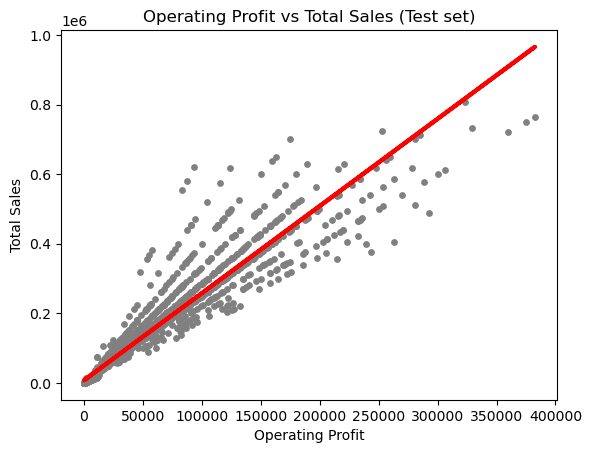

In [65]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Operating Profit vs Total Sales (Test set)')
plot_test.xlabel('Operating Profit')
plot_test.ylabel('Total Sales')
plot_test.show()

In [66]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [67]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.50493019]]
Mean squared error:  1546183378.6775708
R2 score:  0.9201621713735924


In [68]:
y_predicted

array([[ 14121.08128705],
       [ 17527.78634602],
       [ 10488.93251094],
       ...,
       [200242.40429559],
       [ 17986.18857087],
       [ 12049.50401958]])

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4352.0,14121.081287
1,7956.0,17527.786346
2,3900.0,10488.932511
3,437.0,7931.398787
4,5434.0,13760.371340
5,7820.0,15002.816714
6,2331.0,10048.064797
7,12987.0,16145.064881
8,3780.0,11150.234081
9,148750.0,137776.960137


##### Compare how the regression fits the training set

In [70]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [71]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.50493019]]
Mean squared error:  1796553450.7975018
R2 score:  0.9122218446438342


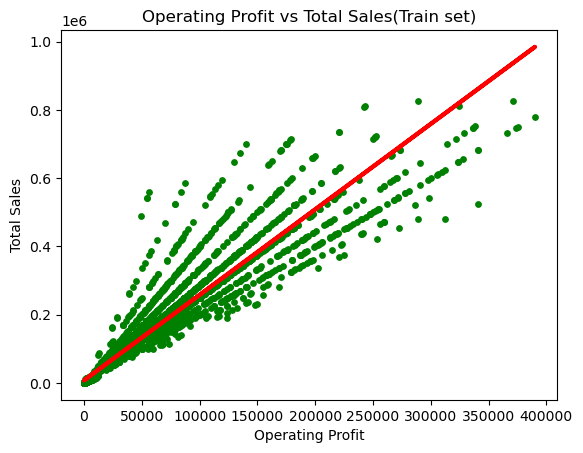

In [73]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Operating Profit vs Total Sales(Train set)')
plot_test.xlabel('Operating Profit')
plot_test.ylabel('Total Sales')
plot_test.show()

#### Bonus: performance improvement after removing outliers

In [74]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Total Sales'] <=50000] 

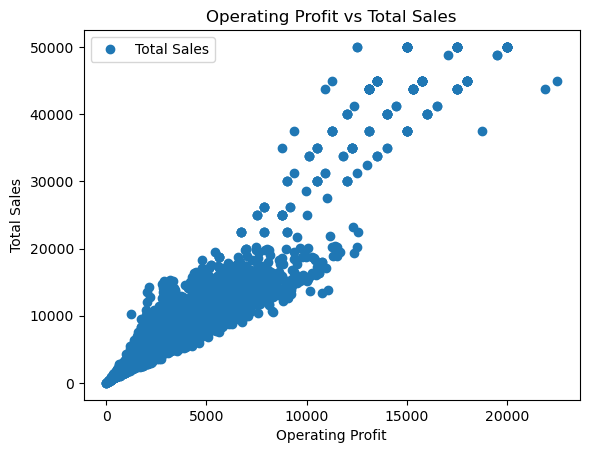

In [75]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Operating Profit', y='Total Sales', style='o')  
plt.title('Operating Profit vs Total Sales')  
plt.xlabel('Operating Profit')  
plt.ylabel('Total Sales')  
plt.show()

In [76]:
# Reshape again.

X_2 = df_test['Operating Profit'].values.reshape(-1,1)
y_2 = df_test['Total Sales'].values.reshape(-1,1)

In [77]:
# Splitting data into a train set and a test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [78]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [79]:
# Creating predictions based on X values from test set
y_predicted_2 = regression.predict(X_test_2)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.50005226]]
Mean squared error:  1796553450.7975018
R2 score:  0.9122218446438342


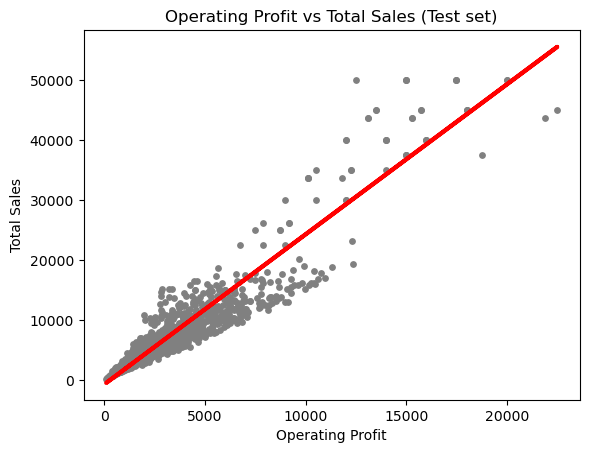

In [81]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Operating Profit vs Total Sales (Test set)')
plot_test.xlabel('Operating Profit')
plot_test.ylabel('Total Sales')
plot_test.show()

In [82]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,2880.0,2622.825225
1,779.0,342.777563
2,1326.0,867.788538
3,10100.0,15470.593790
4,7392.0,8550.449134
5,7260.0,8385.445685
6,7003.0,4912.873095
7,4884.0,7857.934658
8,3834.0,5060.376178
9,2632.0,2337.819267


There is a strong positive relaitonship between variables. The number that represents the total sales of a product or unit sale increase then total sales also increase. The high MSE and high R2 score are good for making predictions